#### 성능지표 - 분류
- 정확도 (Accuracy) : 전체 정답에서 맞춘 정답의 수
- 정밀도 (Precision) : 모델 (예측) 기준으로 모델이 True라고 한 것이 정답(실제)도 True인 것
- 재현율 (Recall) : 정답(실제) 기준으로 정답(실제)이 True라고 한 것이 예측이 True인 것
- F1-Score : 정밀도와 재현율 2가지를 조합한 점수
- 오차행렬 (Confusion Matrix) : 정답과 예측값의 관계 나타내는 표

[1] 모듈 로딩 및 데이터 준비

In [1]:
# 모듈로딩
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score      # sklearn에서 제공하는 모델 성능평가 관련 모듈

import pandas as pd
import numpy as np

In [2]:
# 데이터 로딩
digitBunch = load_digits(as_frame = True)


[2] 피쳐와 레이블 추출

In [5]:
# 0 ~ 9까지 이미지 데이터 값
imgDF = digitBunch['data']


# 0 ~ 9 라벨
labelSR = digitBunch['target']
labelSR.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
## -> 2진분류를 위해서 7과 나머지 라벨 변경
mask = (labelSR == 7)
labelSR[~mask] = 0
labelSR[mask] = 1

In [13]:
labelSR = digitBunch['target']
labelSR2 = (labelSR==7).astype(int)
labelSR.value_counts()

target
0    1618
1     179
Name: count, dtype: int64

[3] 학습용 데이터셋 준비

In [14]:
X_train, X_test, y_train, y_test = train_test_split(imgDF, 
                                                    labelSR,
                                                    stratify = labelSR,
                                                    random_state = 1)

In [16]:
print('[Train]', y_train.value_counts() / y_train.shape[0])
print('[Test]', y_test.value_counts() / y_test.shape[0])

[Train] target
0    0.90052
1    0.09948
Name: count, dtype: float64
[Test] target
0    0.9
1    0.1
Name: count, dtype: float64


[4] 클래스 정의

In [17]:
# 사용자 정의 클래스 DummyClass : 아무것도 하지 않는 클래스, 단순 테스트용
from sklearn.base import BaseEstimator

class MyClassifier(BaseEstimator):
    def fit(self, X, y): pass

    def predict(self, X) : return np.zeros((len(X), 1), dtype = bool)

[5] 학습

In [18]:
# 인스턴스 생성
model = MyClassifier()

# 학습
model.fit(X_train, y_train)


[6] 예측 및 성능 평가

In [19]:
pre_ = model.predict(X_train)
pre_

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

[6-1] 정확도 => 불균형 데이터 경우 신뢰 불가!!!

In [20]:
accuracy_score(y_train, pre_)

0.9005196733481812

[6-2] 오차 행렬

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
y_test = [0,0,0,1,1,  1,0,0,0,1,  1,1,1,0,0,  0,0,0,0,0]
y_pre = [1,1,1,1,1,  1,0,1,0,1,  1,1,1,0,0,  0,0,0,0,0]

In [40]:
# 정답과 예측값 전달
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).reshape(-1)
print(tn, fp, fn, tp)

9 4 0 7


In [41]:
confusion_matrix(y_test, y_pre)

array([[9, 4],
       [0, 7]], dtype=int64)

- 정밀도 (Precision) : 모델(예측) 중심!!

In [43]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pre, zero_division = 0)

0.6363636363636364

- 재현율(Recall) : 정답(실제) 중심!!

In [42]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pre)

1.0

#### 정밀도와 재현율

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))


In [47]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('../Data/titanic.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop("Survived", axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size = 0.20, random_state = 11)

lr_clf = LogisticRegression(solver = 'liblinear')

lr_clf.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [49]:
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


In [50]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935225 0.55064775]
 [0.86335511 0.13664489]
 [0.86429643 0.13570357]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935225 0.55064775 1.        ]
 [0.86335511 0.13664489 0.        ]
 [0.86429643 0.13570357 0.        ]]


In [51]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [52]:
custom_threshold = 0.5

pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


In [53]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197


In [55]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값 : ", custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값 :  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197
임곗값 :  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869
임곗값 :  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705
임곗값 :  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도 : 0.8654, 재현율 : 0.7377
임곗값 :  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213


In [56]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print("반환된 분류 결정 임곗값 배열의 Shape : ", thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임곗값 : ', np.round(thresholds[thr_index], 2))

print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape :  (165,)
샘플 추출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값 :  [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도 :  [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율 :  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


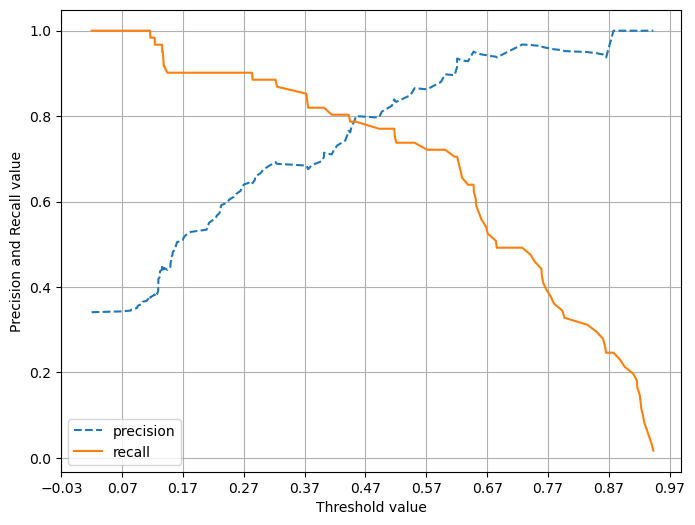

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle ='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])